## Bitscore: HMMER vs MMseqs vs MMore

## MYBENCH Profmark

In [1]:
# imports
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
from matplotlib import cm as cmap
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

In [2]:
# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)

In [3]:
# root directory
path_to_db = "data/other/"

In [4]:
# input files
my_data = {}
my_data["mybench-bitsc"] = {}
my_data["mybench-bitsc"]["file1"] = "{}/mmoreseqs.mybench.all_full.bitsc".format(path_to_db)
my_data["mybench-bitsc"]["file2"] = "{}/mmoreseqs.mybench-single.12.20.bitsc".format(path_to_db)

In [5]:
# data formats
cell_cpu_header = {
    "all_presc": "float",
    "all_bias": "float",
    "all_seqsc": "float",
    "full_presc": "float",
    "full_bias": "float",
    "full_seqsc": "float",
    "truth": "str",
}
names = cell_cpu_header
skiprows = []
usecols = [0,1,2,3,4,5,6]
sep = " "

In [6]:
# input data
key = "mybench-bitsc"
file = my_data[key]["file1"]
data = pd.read_csv( file, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
my_data[key]["data1"] = data

In [7]:
# input data
key = "mybench-bitsc"
file = my_data[key]["file2"]
data = pd.read_csv( file, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
my_data[key]["data2"] = data

In [8]:
# separate TP and FP
key = "mybench-bitsc"
data = my_data[key]["data2"]
data
data_ = data
data_ = data_[ data_["all_seqsc"] > -1000 ]
# data_ = data_[ data_["full_seqsc"] > data_["all_seqsc"] ]

trues   = data_[ data_["truth"] == "T" ]
falses  = data_[ data_["truth"] == "F" ]

In [10]:
# separate TP and FP
key = "mybench-bitsc"
data = my_data[key]["data2"]
data
tmp_data = data
tmp_data = tmp_data[ tmp_data["all_seqsc"] > -1000 ]
tmp_data = tmp_data[ tmp_data["full_seqsc"] <= tmp_data["all_seqsc"] ]
tmp_data

,all_presc,all_bias,all_seqsc,full_presc,full_bias,full_seqsc,truth
0,12TM_1,12TM_1/1/3-408,457,478,73.041,23.883,49.159
1,12TM_1,12TM_1/2/10-448,457,896,39.369,28.236,11.133
2,12TM_1,AA_kinase/1060/185-481,457,606,1.379,1.058,0.321
3,12TM_1,AA_kinase/998/14-304,457,396,2.790,0.920,1.870
4,12TM_1,CBM_11/5445/186-377,457,583,-8.238,1.112,-9.350
...,...,...,...,...,...,...,...
2159913,Zwilch,Prismane/26816/326-940,547,2052,4.830,1.448,3.382
2159914,Zwilch,PRMT5_TIM/26824/11-271,547,297,2.438,2.246,0.192
2159915,Zwilch,Suc_Fer-like/30972/19-226,547,259,4.081,0.927,3.155
2159916,Zwilch,vATP-synt_AC39/34291/479-814,547,1045,1.971,1.288,0.682


In [14]:
# PepSY_TM Data 
pepsy_data = [ [96.80577], [29.6448] ]

In [13]:
# matplotlib settings

colors = {}
colors["scatter"] = {}
colors["scatter"]["tp"] = "green"
colors["scatter"]["fp"] = "red"

colors["plot"] = {}
colors["plot"]["tp"] = "lime"
colors["plot"]["fp"] = "crimson"
colors["plot"]["full"] = "aqua"

# fit lines to data
fx_ = {}

z_x = np.polyfit( [0,1], [0,1], 1)
fx_x = np.poly1d(z_x)

z_0 = np.polyfit( [0,1], [0,0], 1)
fx_0 = np.poly1d(z_0)

fx_["x"] = fx_x
fx_["0"] = fx_0


## Bias-Corrected Sequence Bitscore: Pruned vs Full

In [ ]:
trues["full_seqsc"]

In [14]:
# fit line to data
z_t = np.polyfit( trues["full_seqsc"], trues["all_seqsc"], 1)
fx_t = np.poly1d(z_t)

z_f = np.polyfit( falses["full_seqsc"], falses["all_seqsc"], 1)
fx_f = np.poly1d(z_f)

fx_["seqsc"] = {}
fx_["seqsc"]["tp"] = fx_t
fx_["seqsc"]["fp"] = fx_f

TypeError: expected non-empty vector for x

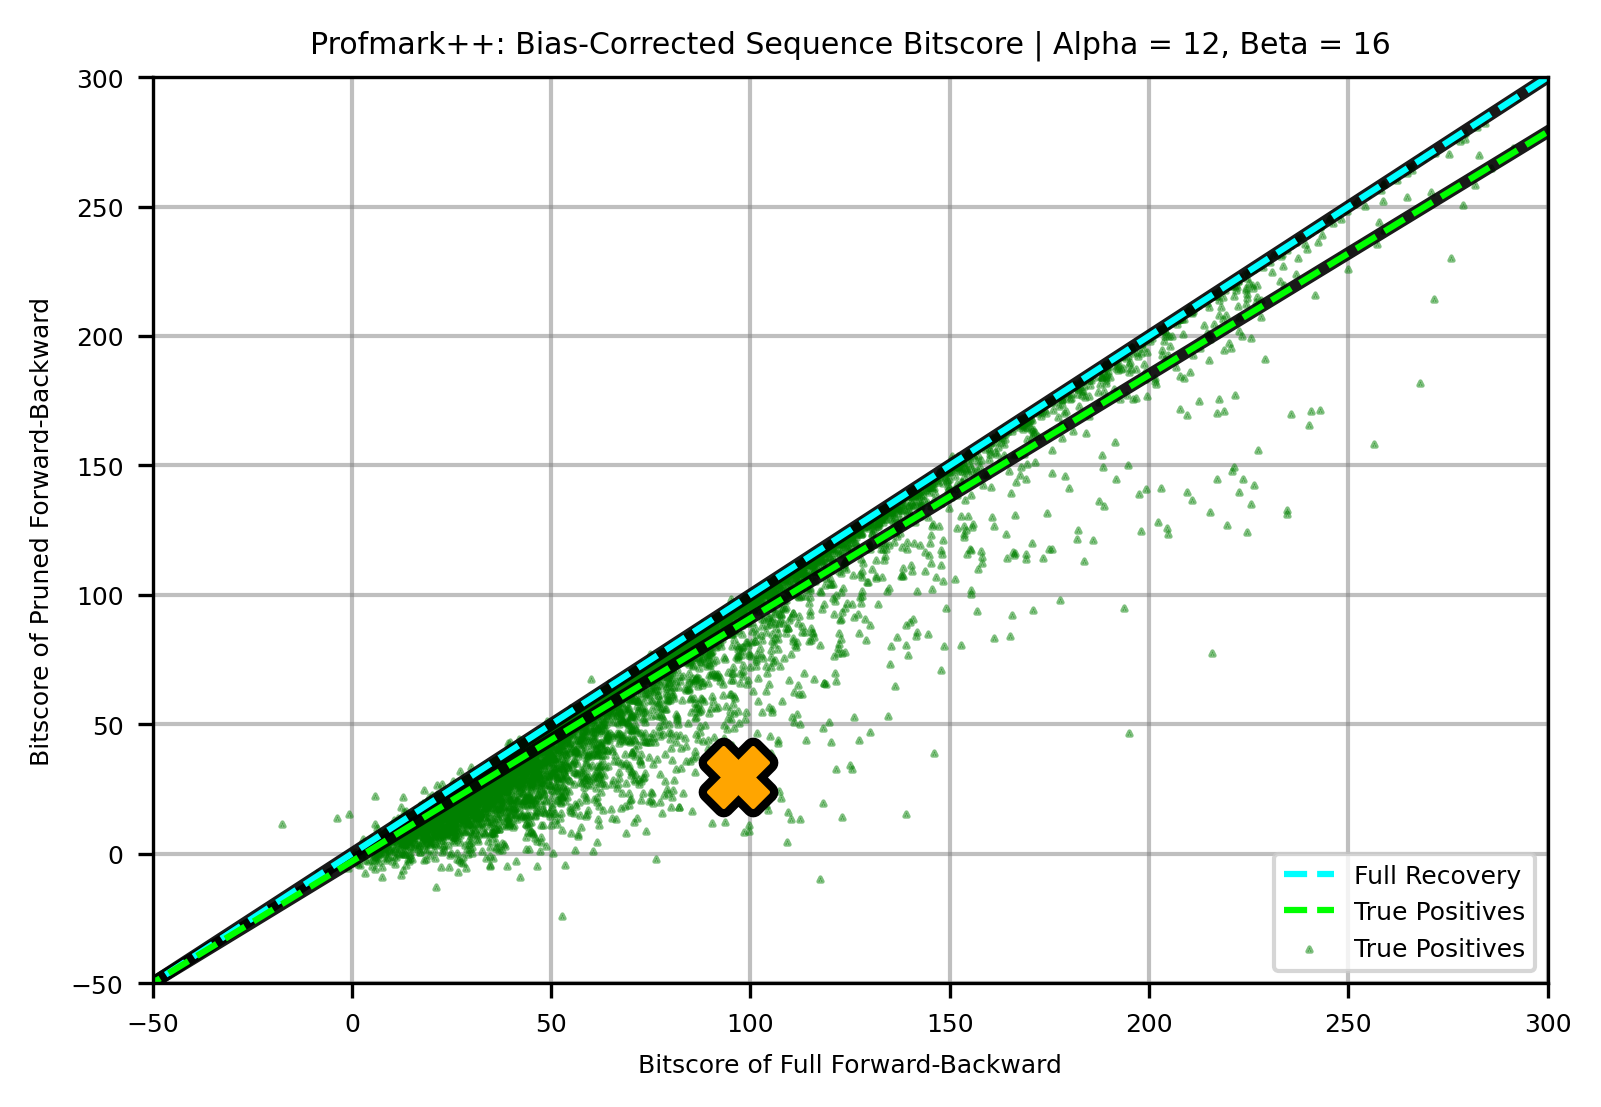

In [33]:
# Plot pruned cells vs total cells
x = [-100, 450]

# fit 
plt.plot( x, fx_["x"](x), color='black', alpha=0.9, linewidth=3.0)
plt.plot( x, fx_["seqsc"]["tp"](x), color='black', alpha=0.9, linewidth=3.0)
# plt.plot( x, fx_["seqsc"]["fp"](x), color='black', alpha=0.9, linewidth=3.0)

plt.plot( x, fx_["x"](x), color='aqua', label="Full Recovery", alpha=1, linestyle='--', linewidth=1.5)
plt.plot( x, fx_["seqsc"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.5)
# plt.plot( x, fx_["seqsc"]["fp"](x), color='crimson', label="True Positives", alpha=1, linestyle='--', linewidth=1.5)

# data points
plt.scatter( trues["full_seqsc"], trues["all_seqsc"], color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
# plt.scatter( falses["full_seqsc"], falses["all_seqsc"], color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

plt.scatter( pepsy_data[0], pepsy_data[1], color="orange", marker="X", s=200, zorder=4, linewidth=1)
plt.scatter( pepsy_data[0], pepsy_data[1], color="black", marker="X", s=200, zorder=3, linewidth=5)

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

# labels
plt.title('Profmark++: Bias-Corrected Sequence Bitscore | Alpha = 12, Beta = 16')
plt.legend(loc='lower right')
plt.ylabel('Bitscore of Pruned Forward-Backward')
plt.xlabel('Bitscore of Full Forward-Backward')

# window
plt.xlim(-50, 300)
plt.ylim(-50, 300)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

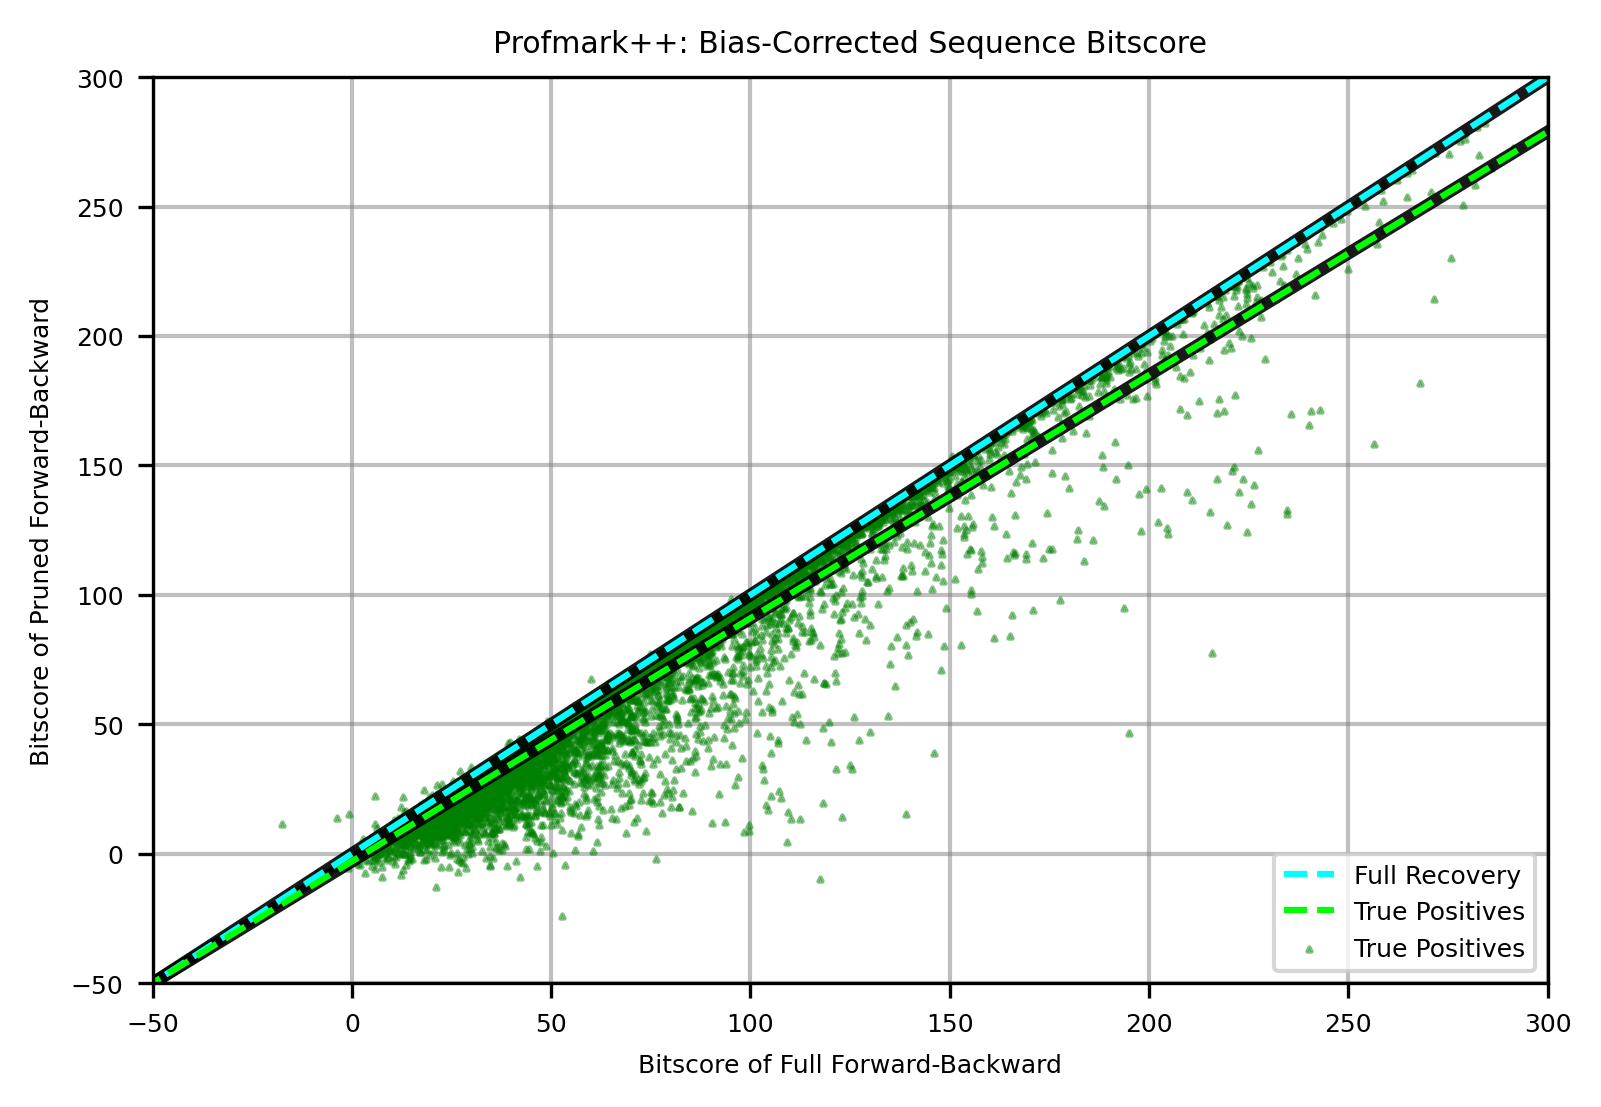

In [11]:
# Plot pruned cells vs total cells
x = [-100, 450]

# fit 
plt.plot( x, fx_["x"](x), color='black', alpha=0.9, linewidth=3.0)
plt.plot( x, fx_["seqsc"]["tp"](x), color='black', alpha=0.9, linewidth=3.0)
# plt.plot( x, fx_["seqsc"]["fp"](x), color='black', alpha=0.9, linewidth=3.0)

plt.plot( x, fx_["x"](x), color='aqua', label="Full Recovery", alpha=1, linestyle='--', linewidth=1.5)
plt.plot( x, fx_["seqsc"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.5)
# plt.plot( x, fx_["seqsc"]["fp"](x), color='crimson', label="True Positives", alpha=1, linestyle='--', linewidth=1.5)

# data points
plt.scatter( trues["full_seqsc"], trues["all_seqsc"], color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
# plt.scatter( falses["full_seqsc"], falses["all_seqsc"], color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

# labels
plt.title('Profmark++: Bias-Corrected Sequence Bitscore')
plt.legend(loc='lower right')
plt.ylabel('Bitscore of Pruned Forward-Backward')
plt.xlabel('Bitscore of Full Forward-Backward')

# window
plt.xlim(-50, 300)
plt.ylim(-50, 300)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

## Bias-Corrected Sequence Bitscore: Difference vs Full

In [12]:
# fit line to data
z_t = np.polyfit( trues["full_seqsc"], trues["full_seqsc"] - trues["all_presc"], 1)
fx_t = np.poly1d(z_t)

z_f = np.polyfit( falses["full_seqsc"], falses["full_seqsc"] - falses["all_presc"], 1)
fx_f = np.poly1d(z_f)

fx_["seqsc-diff"] = {}
fx_["seqsc-diff"]["tp"] = fx_t
fx_["seqsc-diff"]["fp"] = fx_f

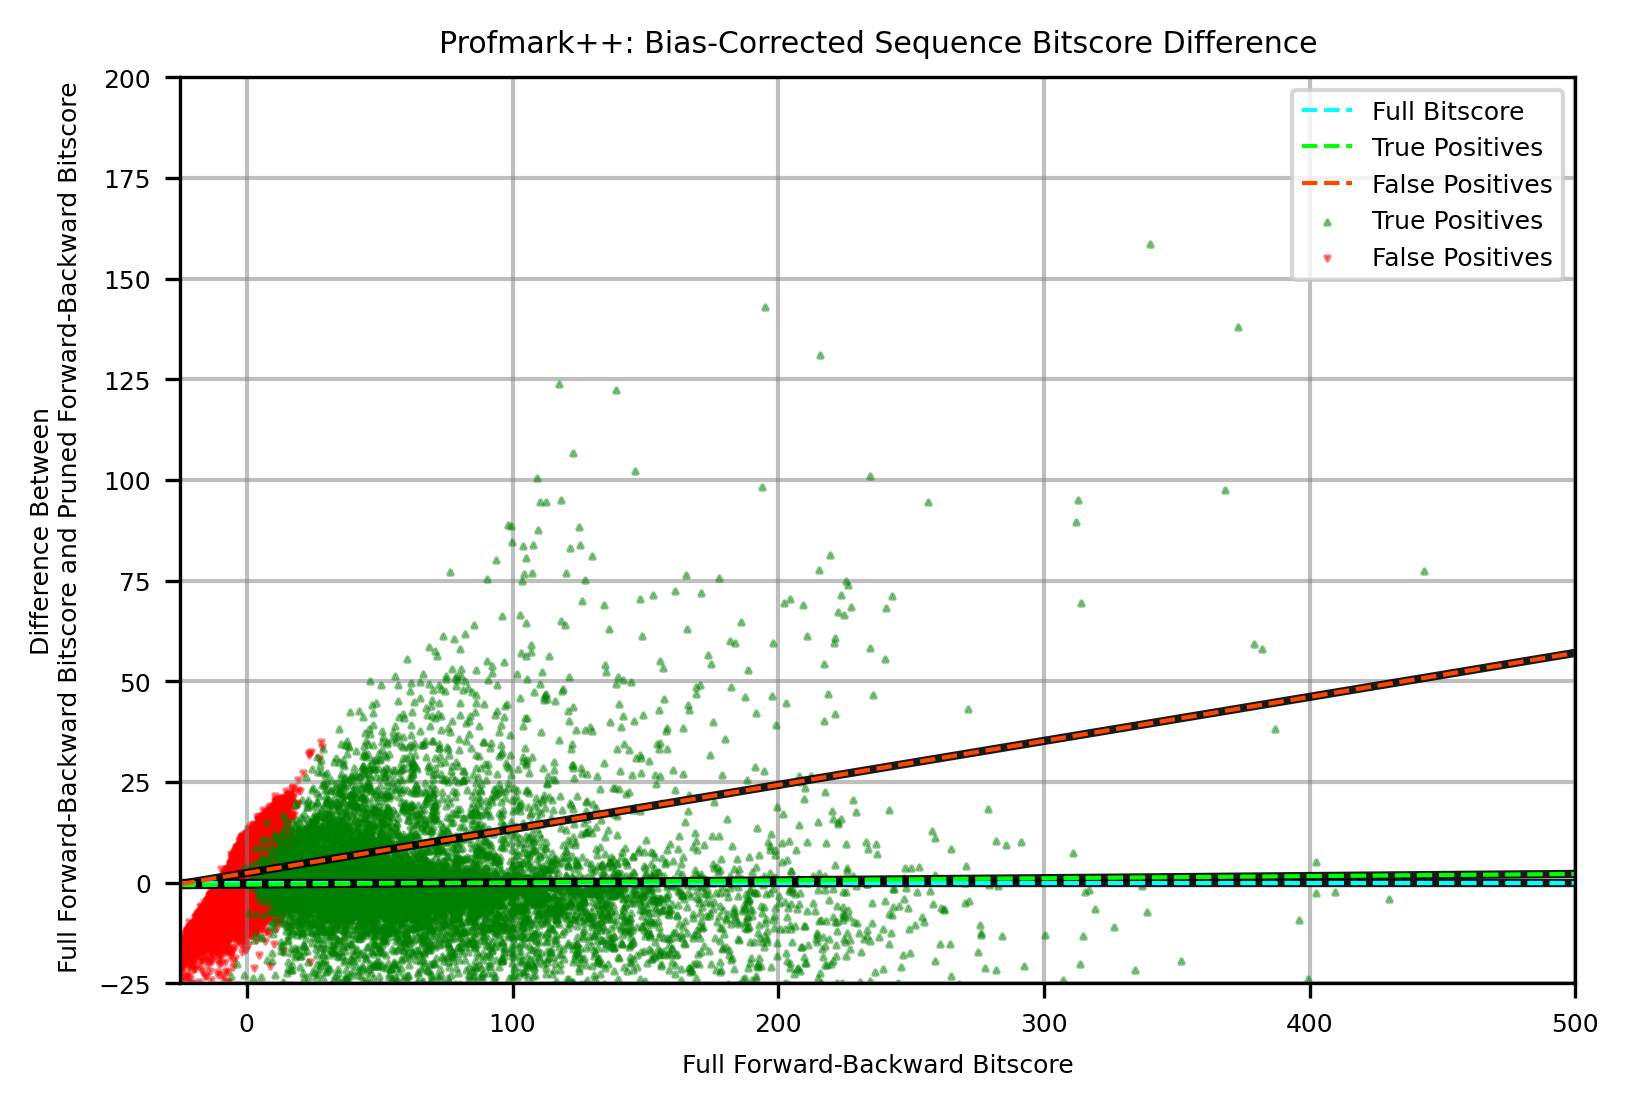

In [14]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
plt.plot( x, fx_["0"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["seqsc-diff"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["seqsc-diff"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

plt.plot( x, fx_["0"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["seqsc-diff"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["seqsc-diff"]["fp"](x), color='orangered', label="False Positives", alpha=1, linestyle='--', linewidth=1.0)

# data points
plt.scatter( trues["full_seqsc"], trues["full_seqsc"] - trues["all_presc"], color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
plt.scatter( falses["full_seqsc"], falses["full_seqsc"] - falses["all_presc"], color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Bias-Corrected Sequence Bitscore Difference')
plt.legend(loc='upper right')
plt.ylabel('Difference Between\n Full Forward-Backward Bitscore and Pruned Forward-Backward Bitscore')
plt.xlabel('Full Forward-Backward Bitscore')

plt.ylim(-25, 200)
plt.xlim(-25, 500)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

## Bias Bitscore: Pruned vs Full

In [189]:
# fit line to data
z_t = np.polyfit( trues["full_bias"], trues["all_bias"], 1)
fx_t = np.poly1d(z_t)

z_f = np.polyfit( falses["full_bias"], falses["all_bias"], 1)
fx_f = np.poly1d(z_f)

fx_["bias"] = {}
fx_["bias"]["tp"] = fx_t
fx_["bias"]["fp"] = fx_f

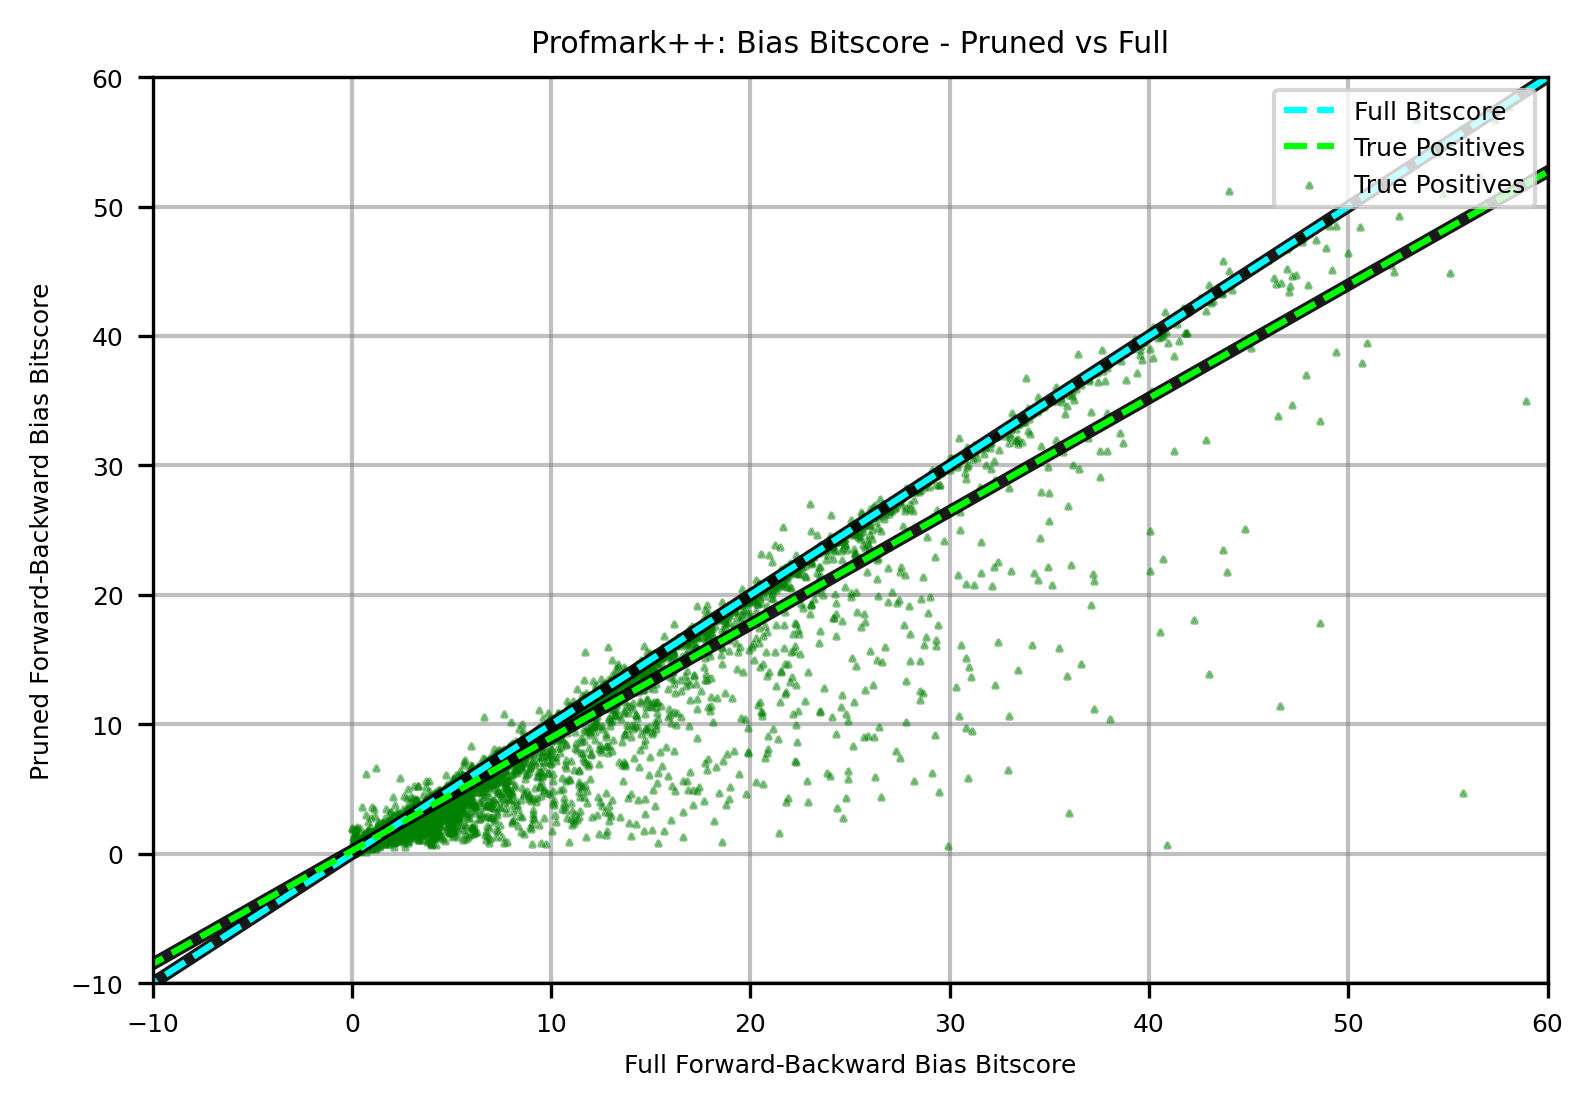

In [190]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
plt.plot( x, fx_["x"](x), color='black', alpha=0.9, linewidth=3.0)
plt.plot( x, fx_["bias"]["tp"](x), color='black', alpha=0.9, linewidth=3.0)
# plt.plot( x, fx_["bias"]["fp"](x), color='black', alpha=0.9, linewidth=3.0)

plt.plot( x, fx_["x"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.5)
plt.plot( x, fx_["bias"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.5)
# plt.plot( x, fx_["bias"]["fp"](x), color='crimson', label="False Positives", alpha=1, linestyle='--', linewidth=1.5)

# data points
plt.scatter( trues["full_bias"], trues["all_bias"], color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
# plt.scatter( falses["full_bias"], falses["all_bias"], color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Bias Bitscore - Pruned vs Full')
plt.legend(loc='bottom right')
plt.ylabel('Pruned Forward-Backward Bias Bitscore')
plt.xlabel('Full Forward-Backward Bias Bitscore')

# window
plt.ylim(-10, 60)
plt.xlim(-10, 60)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

## Bias Bitscore: Difference vs Full

In [150]:
# fit line to data
z_t = np.polyfit( trues["full_bias"], np.abs(trues["full_bias"] - trues["all_bias"]), 1)
fx_t = np.poly1d(z_t)

z_f = np.polyfit( falses["full_bias"], np.abs(falses["full_bias"] - falses["all_bias"]), 1)
fx_f = np.poly1d(z_f)

fx_["bias-diff"] = {}
fx_["bias-diff"]["tp"] = fx_t
fx_["bias-diff"]["fp"] = fx_f

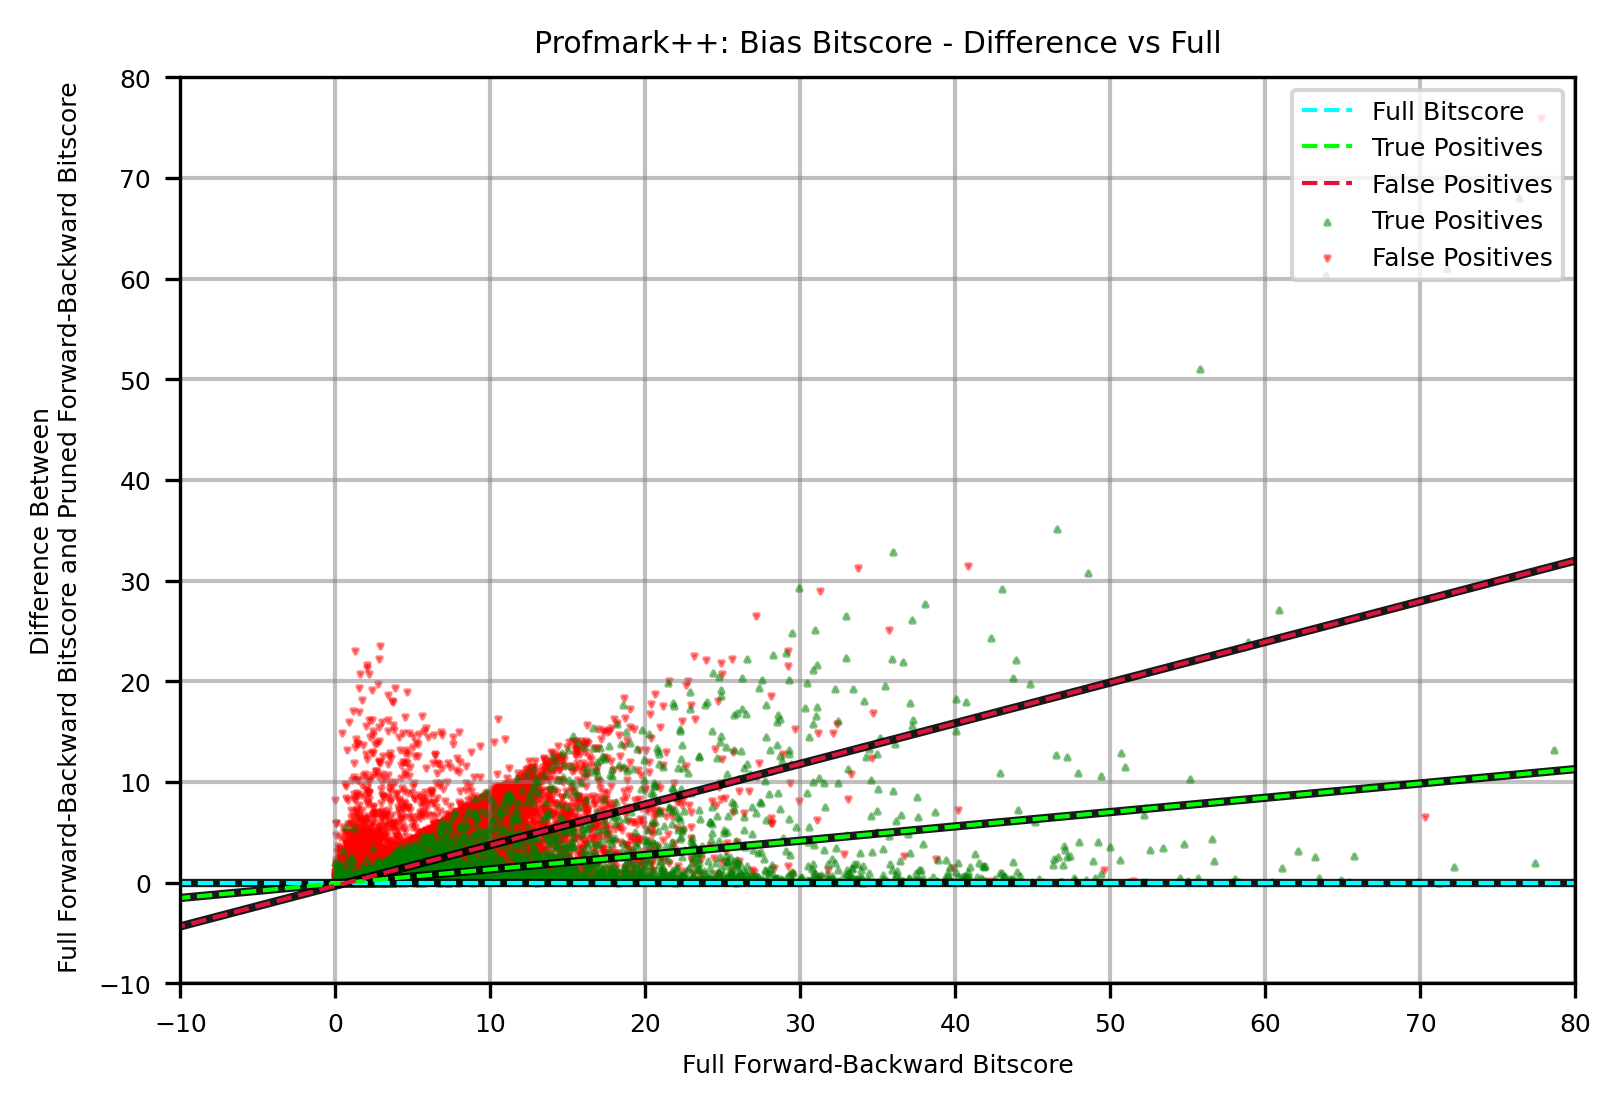

In [155]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
plt.plot( x, fx_["0"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["bias-diff"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["bias-diff"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

plt.plot( x, fx_["0"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["bias-diff"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["bias-diff"]["fp"](x), color='crimson', label="False Positives", alpha=1, linestyle='--', linewidth=1.0)

# data points
plt.scatter( trues["full_bias"], np.abs(trues["full_bias"] - trues["all_bias"]), color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
plt.scatter( falses["full_bias"], np.abs(falses["full_bias"] - falses["all_bias"]), color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Bias Bitscore - Difference vs Full')
plt.legend(loc='upper right')
plt.ylabel('Difference Between\n Full Forward-Backward Bitscore and Pruned Forward-Backward Bitscore')
plt.xlabel('Full Forward-Backward Bitscore')

plt.ylim(-10, 80)
plt.xlim(-10, 80)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

## Raw Sequence Bitscore: Pruned vs Full

In [156]:
# fit line to data
z_t = np.polyfit( trues["full_presc"], trues["all_presc"], 1)
fx_t = np.poly1d(z_t)

z_f = np.polyfit( falses["full_presc"], falses["all_presc"], 1)
fx_f = np.poly1d(z_f)

fx_["presc"] = {}
fx_["presc"]["tp"] = fx_t
fx_["presc"]["fp"] = fx_f

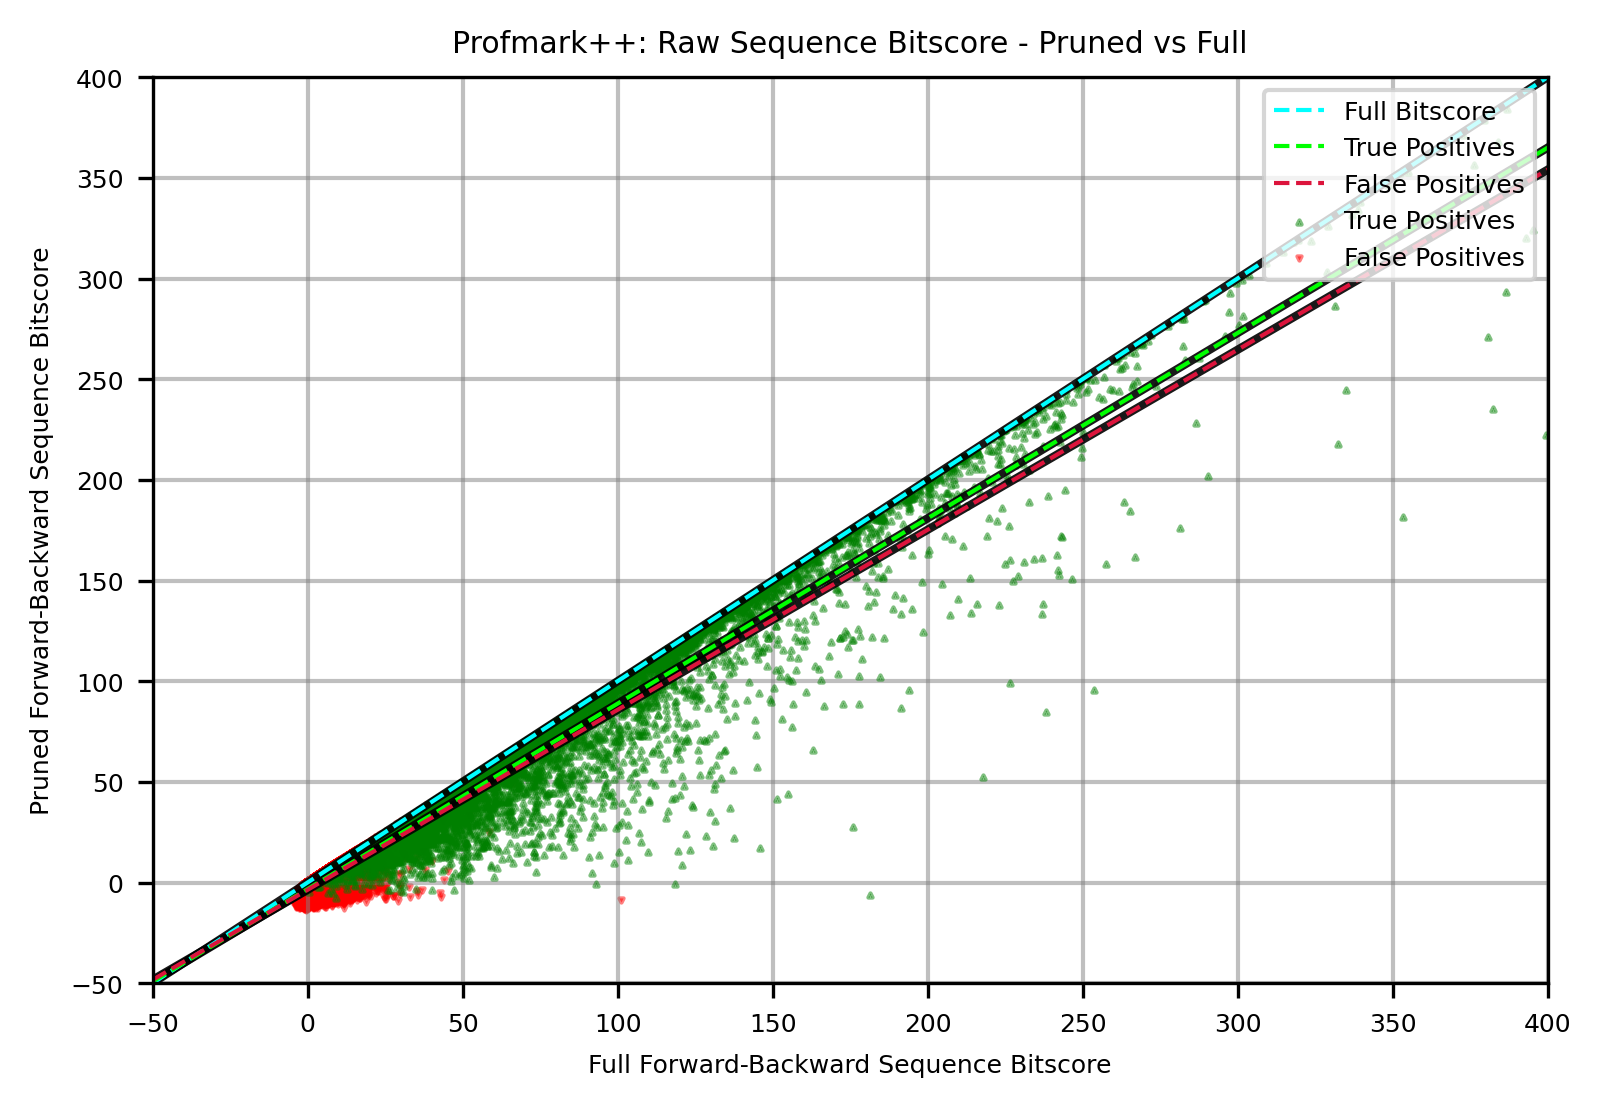

In [158]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
plt.plot( x, fx_["x"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["presc"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["presc"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

plt.plot( x, fx_["x"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["presc"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["presc"]["fp"](x), color='crimson', label="False Positives", alpha=1, linestyle='--', linewidth=1.0)

# data points
plt.scatter( trues["full_presc"], trues["all_presc"], color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
plt.scatter( falses["full_presc"], falses["all_presc"], color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Raw Sequence Bitscore - Pruned vs Full')
plt.legend(loc='upper right')
plt.ylabel('Pruned Forward-Backward Sequence Bitscore')
plt.xlabel('Full Forward-Backward Sequence Bitscore')

# window
plt.xlim(-50, 400)
plt.ylim(-50, 400)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

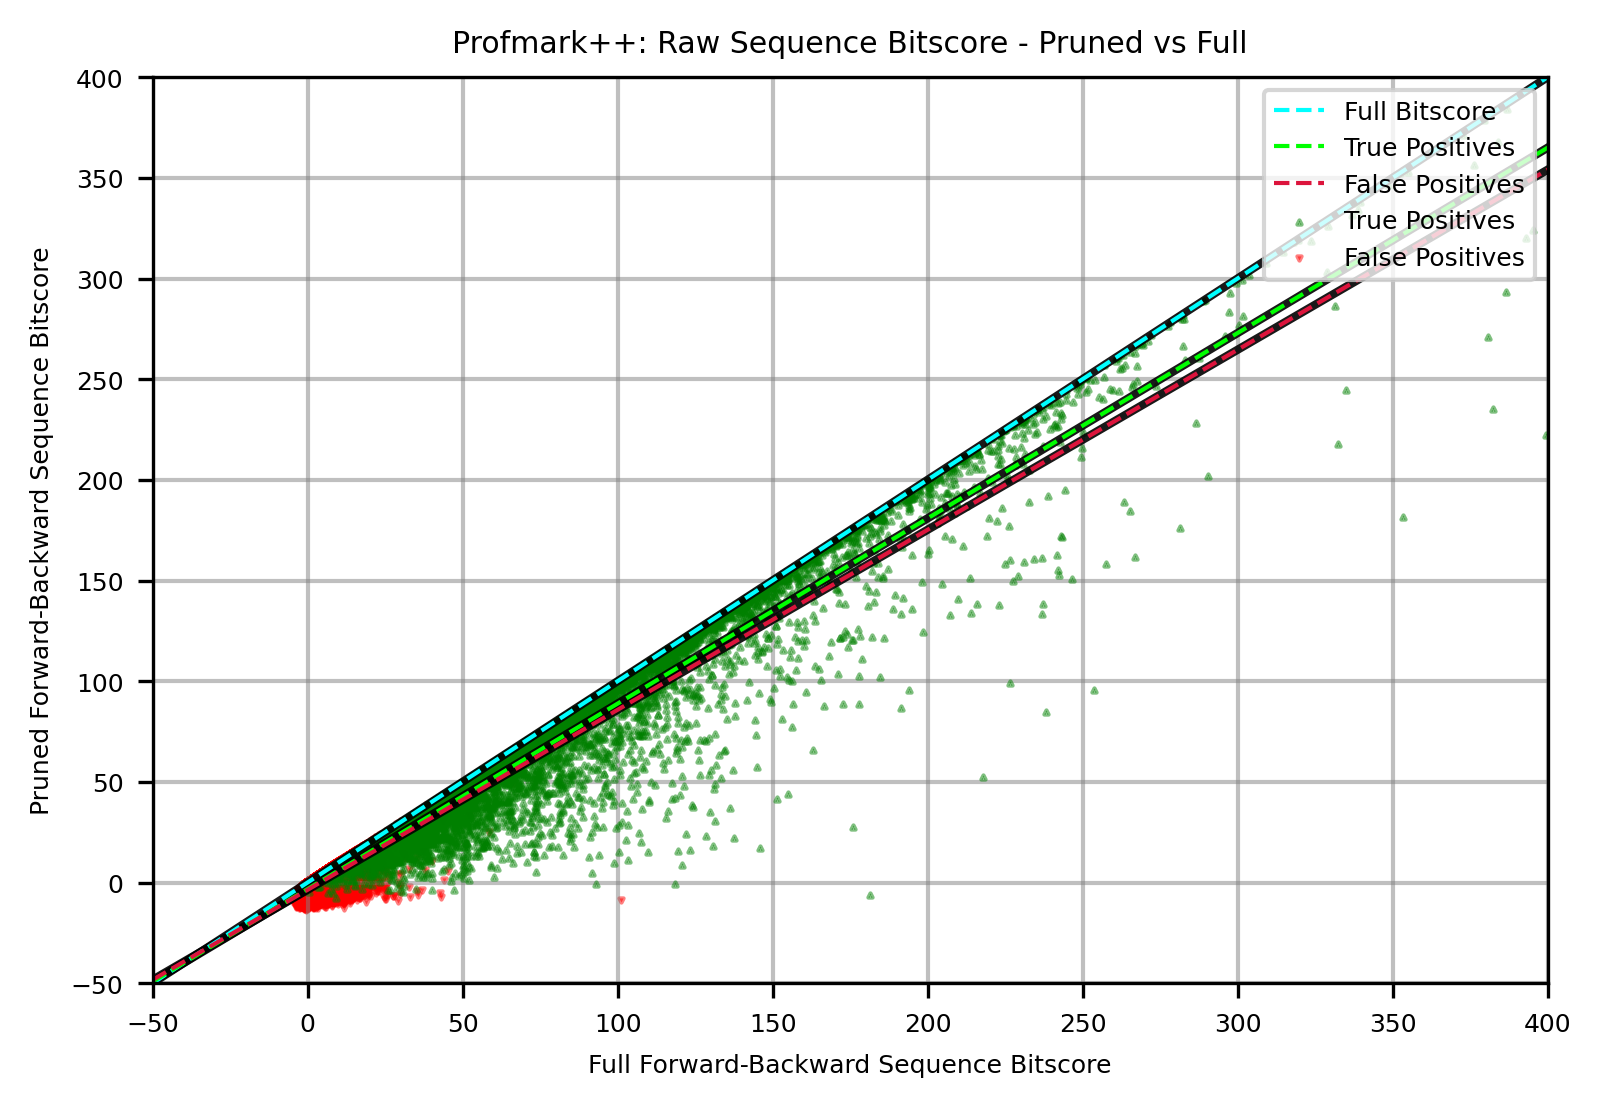

In [158]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
plt.plot( x, fx_["x"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["presc"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
# plt.plot( x, fx_["presc"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

plt.plot( x, fx_["x"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["presc"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.0)
# plt.plot( x, fx_["presc"]["fp"](x), color='crimson', label="False Positives", alpha=1, linestyle='--', linewidth=1.0)

# data points
plt.scatter( trues["full_presc"], trues["all_presc"], color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
plt.scatter( falses["full_presc"], falses["all_presc"], color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Raw Sequence Bitscore - Pruned vs Full')
plt.legend(loc='upper right')
plt.ylabel('Pruned Forward-Backward Sequence Bitscore')
plt.xlabel('Full Forward-Backward Sequence Bitscore')

# window
plt.xlim(-50, 400)
plt.ylim(-50, 400)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

## Raw Sequence Bitscore: Difference vs Full

In [134]:
# fit line to data
z_t = np.polyfit( trues["full_presc"], np.abs(trues["full_presc"] - trues["all_presc"]), 1)
fx_t = np.poly1d(z_t)

z_f = np.polyfit( falses["full_presc"], np.abs(falses["full_presc"] - falses["all_presc"]), 1)
fx_f = np.poly1d(z_f)

fx_["presc-diff"] = {}
fx_["presc-diff"]["tp"] = fx_t
fx_["presc-diff"]["fp"] = fx_f

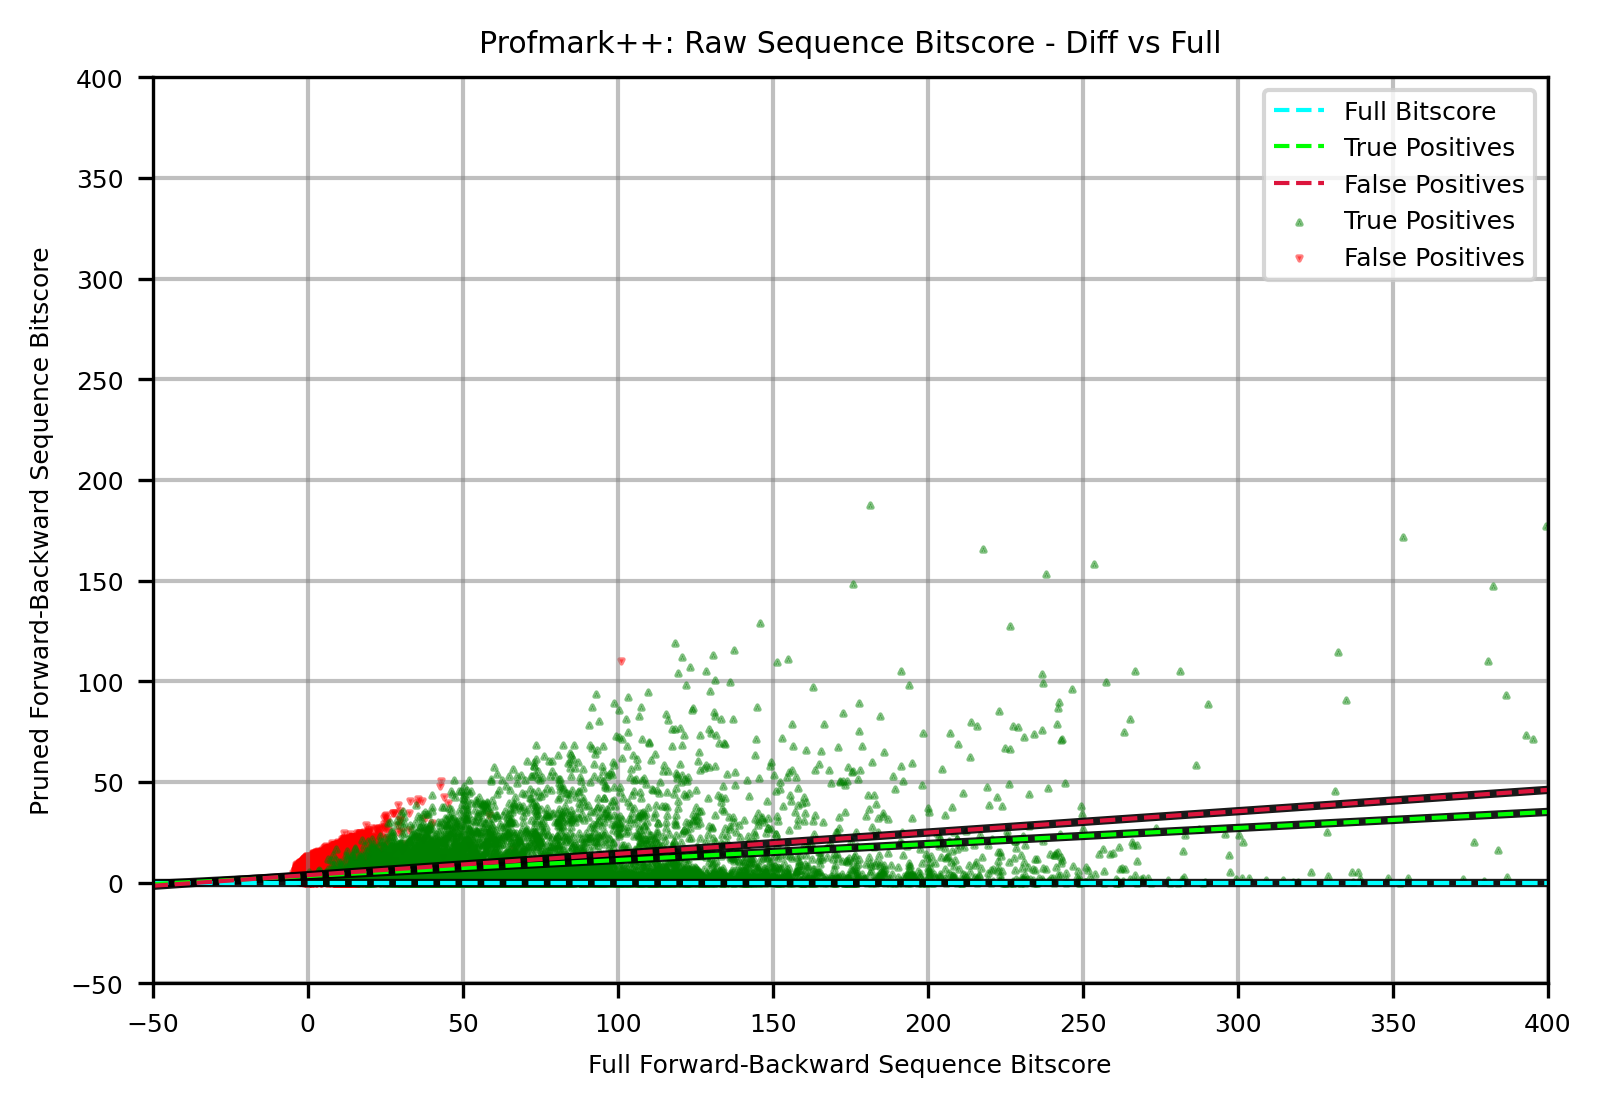

In [160]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
plt.plot( x, fx_["0"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["presc-diff"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["presc-diff"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

plt.plot( x, fx_["0"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["presc-diff"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["presc-diff"]["fp"](x), color='crimson', label="False Positives", alpha=1, linestyle='--', linewidth=1.0)

# data points
plt.scatter( trues["full_presc"], np.abs(trues["full_presc"] - trues["all_presc"]), color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
plt.scatter( falses["full_presc"], np.abs(falses["full_presc"] - falses["all_presc"]), color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Raw Sequence Bitscore - Diff vs Full')
plt.legend(loc='upper right')
plt.ylabel('Pruned Forward-Backward Sequence Bitscore')
plt.xlabel('Full Forward-Backward Sequence Bitscore')

# window
plt.xlim(-50, 400)
plt.ylim(-50, 400)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

## Bias Improvement

In [167]:
# fit line to data
z_t = np.polyfit( trues["full_seqsc"], np.abs(trues["full_seqsc"] - trues["all_presc"]) - np.abs(trues["full_seqsc"] - trues["all_seqsc"]), 1)
fx_t = np.poly1d(z_t)

# z_t1 = np.polyfit( trues["full_seqsc"], np.abs(trues["full_seqsc"] - trues["all_presc"]) - np.abs(trues["full_seqsc"] - trues["all_seqsc"]), 1)
# fx_t1 = np.poly1d(z_t)

# z_f = np.polyfit( falses["full_presc"], np.abs(falses["full_presc"] - falses["all_presc"]), 1)
# fx_f = np.poly1d(z_f)

fx_["bias-imp"] = {}
fx_["bias-imp"]["tp"] = fx_t
# fx_["presc-diff"]["fp"] = fx_f

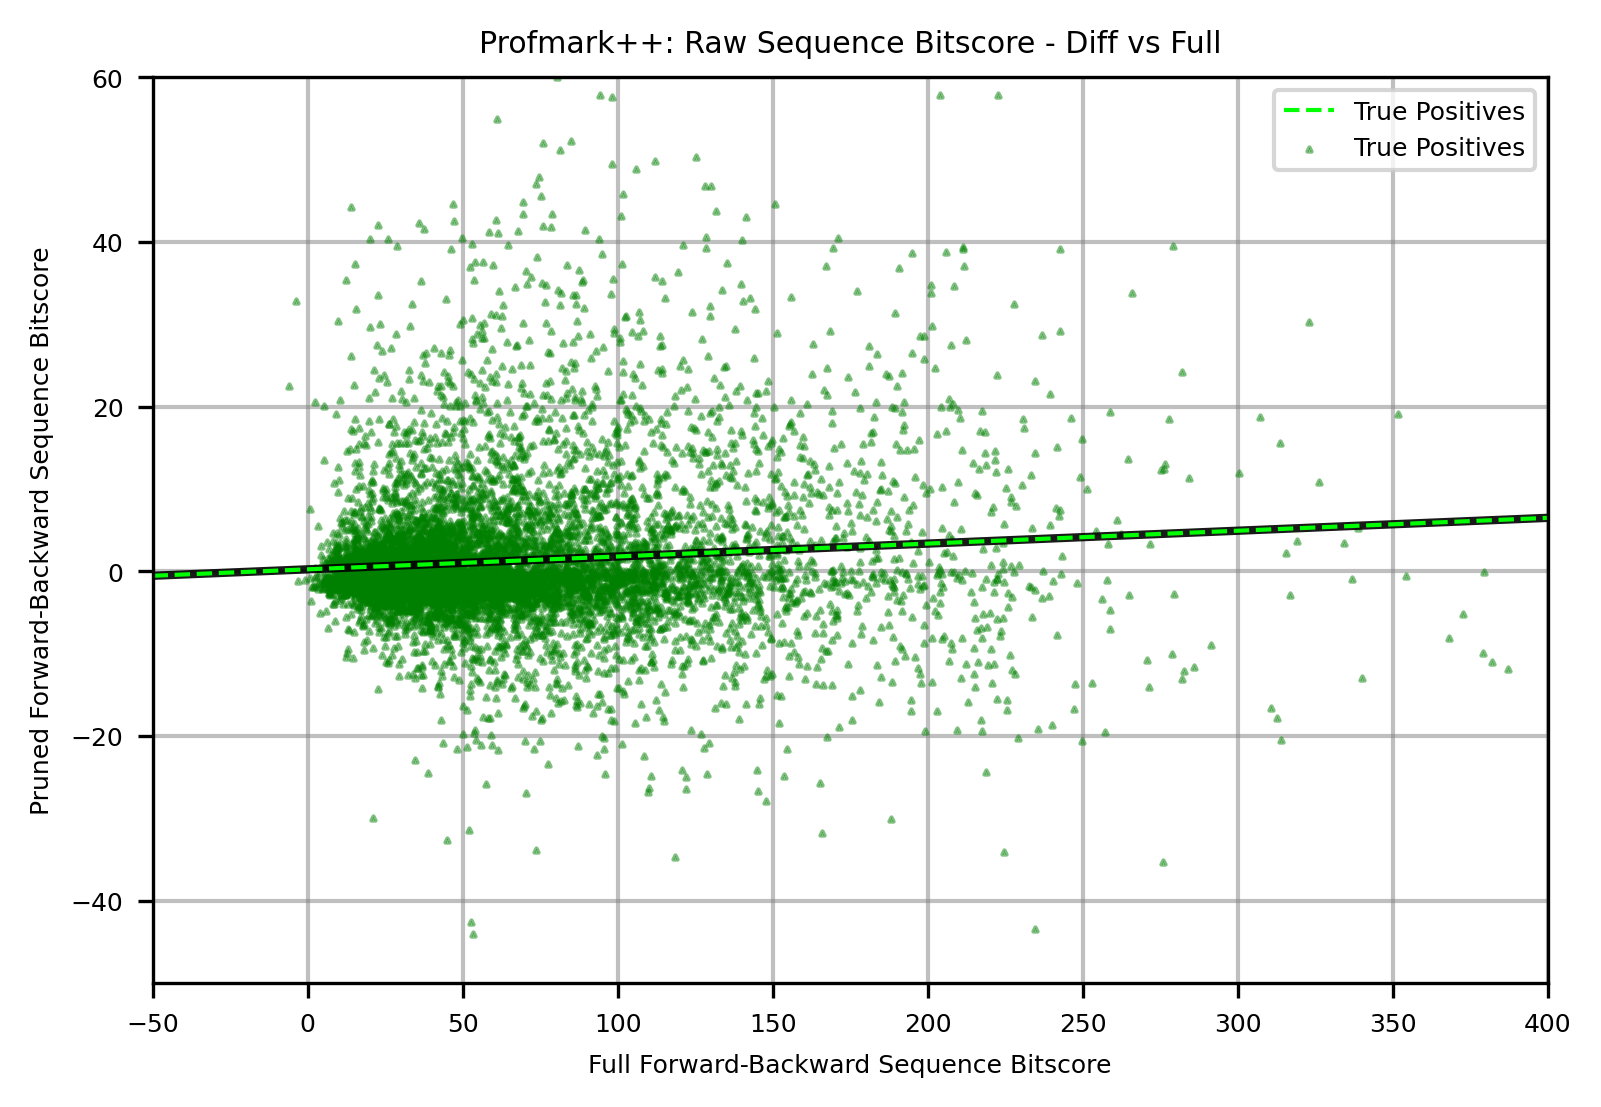

In [169]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
# plt.plot( x, fx_["0"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["bias-imp"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
# plt.plot( x, fx_["presc-diff"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

# plt.plot( x, fx_["0"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["bias-imp"]["tp"](x), color='lime', label="True Positives", alpha=1, linestyle='--', linewidth=1.0)
# plt.plot( x, fx_["presc-diff"]["fp"](x), color='crimson', label="False Positives", alpha=1, linestyle='--', linewidth=1.0)

# data points
plt.scatter( trues["full_seqsc"], np.abs(trues["full_seqsc"] - trues["all_presc"]) - np.abs(trues["full_seqsc"] - trues["all_seqsc"]), color="green", label="True Positives", marker='^', s=1, alpha=0.5, zorder=2 )
# plt.scatter( falses["full_presc"], np.abs(falses["full_presc"] - falses["all_presc"]), color="red", label="False Positives", marker='v', s=1, alpha=0.5, zorder=1 )

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Raw Sequence Bitscore - Diff vs Full')
plt.legend(loc='upper right')
plt.ylabel('Pruned Forward-Backward Sequence Bitscore')
plt.xlabel('Full Forward-Backward Sequence Bitscore')

# window
plt.xlim(-50, 400)
plt.ylim(-50, 60)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

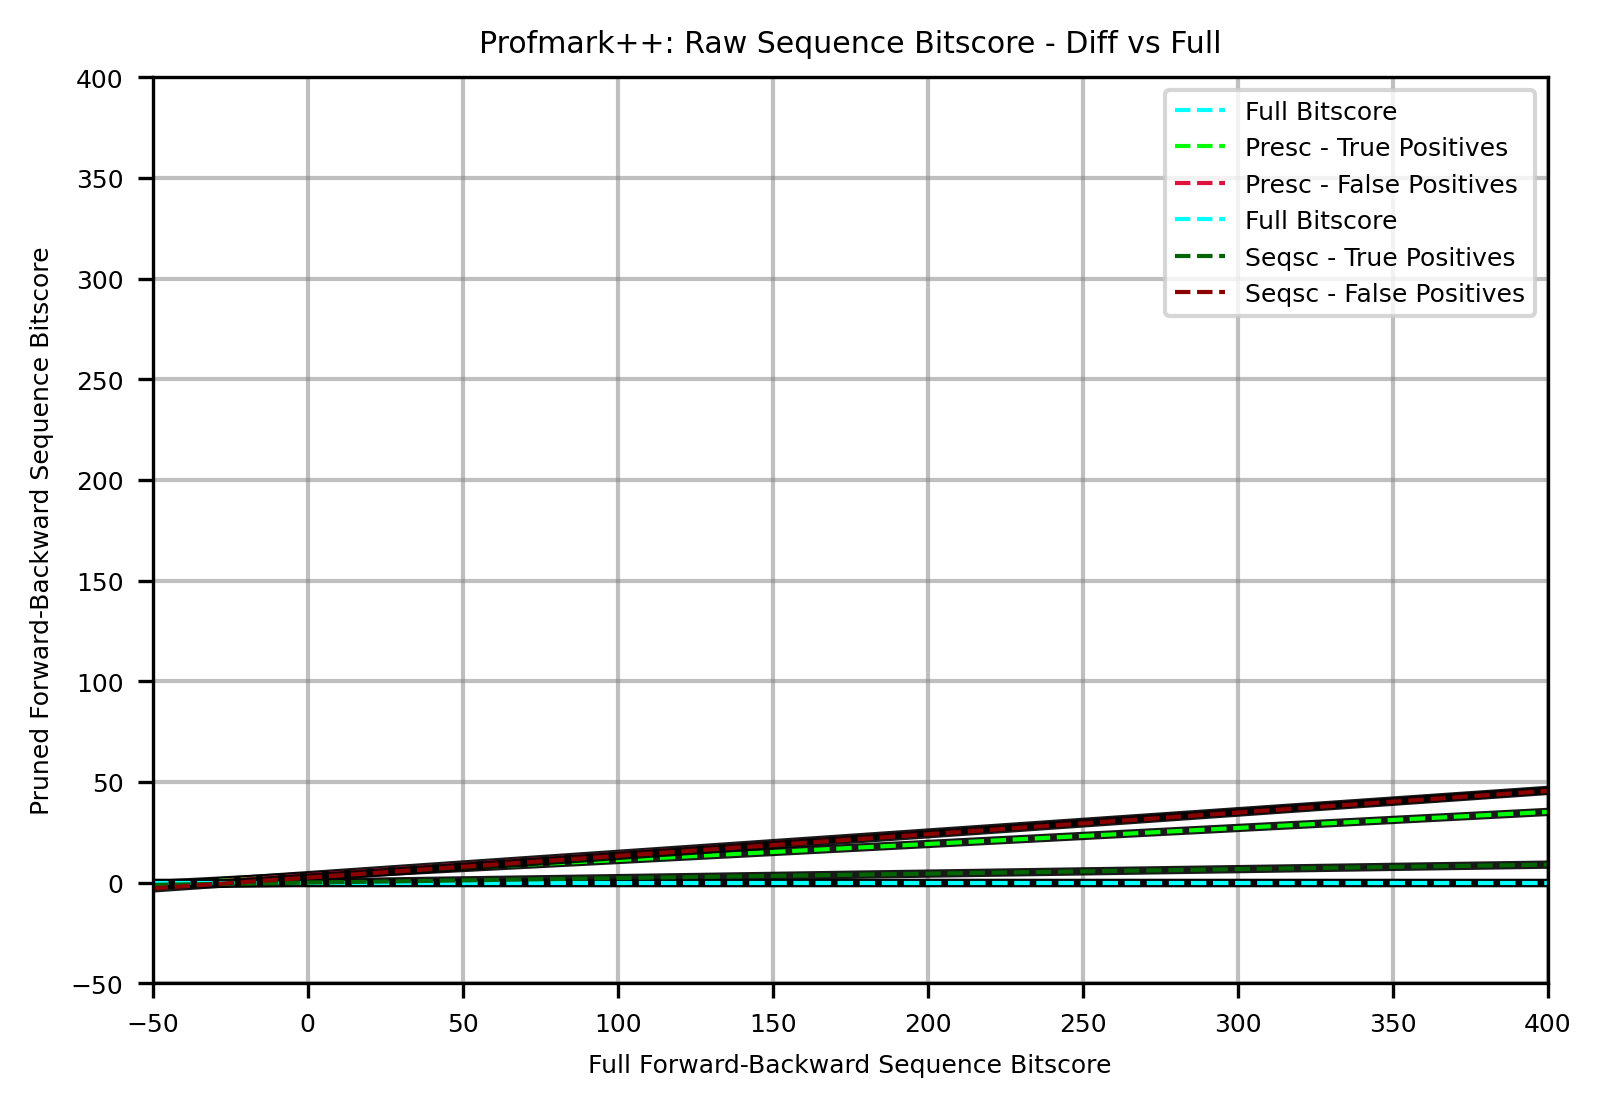

In [161]:
# Plot pruned cells vs total cells
x = [-50, 550]

# fit lines
plt.plot( x, fx_["0"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["presc-diff"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["presc-diff"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

plt.plot( x, fx_["0"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["presc-diff"]["tp"](x), color='lime', label="Presc - True Positives", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["presc-diff"]["fp"](x), color='crimson', label="Presc - False Positives", alpha=1, linestyle='--', linewidth=1.0)

plt.plot( x, fx_["0"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["seqsc-diff"]["tp"](x), color='black', alpha=0.9, linewidth=2.0)
plt.plot( x, fx_["seqsc-diff"]["fp"](x), color='black', alpha=0.9, linewidth=2.0)

plt.plot( x, fx_["0"](x), color='aqua', label="Full Bitscore", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["seqsc-diff"]["tp"](x), color='darkgreen', label="Seqsc - True Positives", alpha=1, linestyle='--', linewidth=1.0)
plt.plot( x, fx_["seqsc-diff"]["fp"](x), color='darkred', label="Seqsc - False Positives", alpha=1, linestyle='--', linewidth=1.0)

# grid 
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.5)

plt.title('Profmark++: Raw Sequence Bitscore - Diff vs Full')
plt.legend(loc='upper right')
plt.ylabel('Pruned Forward-Backward Sequence Bitscore')
plt.xlabel('Full Forward-Backward Sequence Bitscore')

# window
plt.xlim(-50, 400)
plt.ylim(-50, 400)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()